In [1]:
import pandas as pd

# Load raw data
raw_data_path = "../data/youth_data.csv"  # Adjust path if needed
df = pd.read_csv(raw_data_path)

# Display basic information
print("Raw Dataset Overview:")
print(df.info())

# Display first few rows
print("\nFirst 5 Rows of Raw Dataset:")
print(df.head())


Raw Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10561 entries, 0 to 10560
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IRALCFY      10561 non-null  int64  
 1   IRMJFY       10561 non-null  int64  
 2   IRCIGFM      10561 non-null  float64
 3   IRSMKLSS30N  10561 non-null  int64  
 4   IRALCFM      10561 non-null  float64
 5   IRMJFM       10561 non-null  float64
 6   IRCIGAGE     10561 non-null  int64  
 7   IRSMKLSSTRY  10561 non-null  int64  
 8   IRALCAGE     10561 non-null  int64  
 9   IRMJAGE      10561 non-null  int64  
 10  MRJFLAG      10561 non-null  int64  
 11  ALCFLAG      10561 non-null  int64  
 12  TOBFLAG      10561 non-null  int64  
 13  ALCYDAYS     10561 non-null  int64  
 14  MRJYDAYS     10561 non-null  int64  
 15  ALCMDAYS     10561 non-null  int64  
 16  MRJMDAYS     10561 non-null  int64  
 17  CIGMDAYS     10561 non-null  int64  
 18  SMKLSMDAYS   10561 non-n

In [2]:
import numpy as np

# Handle special codes (retain 91 and 93, replace 97 and 98 with NaN)
special_codes = {97: np.nan, 98: np.nan}
substance_cols = ['IRCIGFM', 'IRALCFY', 'IRMJFY']
df[substance_cols] = df[substance_cols].replace(special_codes)

# Check distribution of cleaned values
for col in substance_cols:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts(dropna=False))



Distribution of IRCIGFM:
IRCIGFM
91.0    9796
93.0     619
1.0       48
2.0       30
3.0       13
4.0       10
5.0        9
10.0       8
30.0       6
6.0        4
15.0       3
20.0       2
7.0        2
23.0       2
25.0       2
8.0        2
28.0       1
11.0       1
13.0       1
14.5       1
27.0       1
Name: count, dtype: int64

Distribution of IRALCFY:
IRALCFY
991    8157
993     539
1       326
2       221
3       190
       ... 
34        1
61        1
86        1
67        1
70        1
Name: count, Length: 90, dtype: int64

Distribution of IRMJFY:
IRMJFY
991.0    8971
993.0     255
1.0       121
2.0        81
3.0        65
         ... 
214.0       1
70.0        1
206.0       1
340.0       1
133.0       1
Name: count, Length: 138, dtype: int64


In [3]:
# Create binary target variable for cigarette use
df['cigarette_use'] = df['IRCIGFM'].apply(lambda x: 0 if x in [91, 93] else 1)

# Create multi-class target variable for marijuana frequency
df['marijuana_freq'] = pd.cut(
    df['IRMJFY'], 
    bins=[-1, 0, 30, 60, np.inf], 
    labels=['Never', 'Seldom', 'Sometimes', 'Frequent']
)

# Display value counts for target variables
print("\nCigarette Use Distribution:")
print(df['cigarette_use'].value_counts())

print("\nMarijuana Frequency Distribution:")
print(df['marijuana_freq'].value_counts())



Cigarette Use Distribution:
cigarette_use
0    10415
1      146
Name: count, dtype: int64

Marijuana Frequency Distribution:
marijuana_freq
Frequent     9705
Seldom        664
Sometimes     189
Never           0
Name: count, dtype: int64


In [4]:
# Drop rows with missing values in key columns
key_columns = substance_cols + ['ALCYDAYS', 'PARHLPHW', 'SCHFELT', 'INCOME']
df_cleaned = df.dropna(subset=key_columns)

# Display information about cleaned dataset
print("\nCleaned Dataset Overview:")
print(df_cleaned.info())

# Save cleaned data (optional step)
cleaned_data_path = "../data/processed_data.csv"
df_cleaned.to_csv(cleaned_data_path, index=False)
print(f"Cleaned data saved to {cleaned_data_path}")



Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 10469 entries, 0 to 10560
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   IRALCFY         10469 non-null  int64   
 1   IRMJFY          10469 non-null  float64 
 2   IRCIGFM         10469 non-null  float64 
 3   IRSMKLSS30N     10469 non-null  int64   
 4   IRALCFM         10469 non-null  float64 
 5   IRMJFM          10469 non-null  float64 
 6   IRCIGAGE        10469 non-null  int64   
 7   IRSMKLSSTRY     10469 non-null  int64   
 8   IRALCAGE        10469 non-null  int64   
 9   IRMJAGE         10469 non-null  int64   
 10  MRJFLAG         10469 non-null  int64   
 11  ALCFLAG         10469 non-null  int64   
 12  TOBFLAG         10469 non-null  int64   
 13  ALCYDAYS        10469 non-null  int64   
 14  MRJYDAYS        10469 non-null  int64   
 15  ALCMDAYS        10469 non-null  int64   
 16  MRJMDAYS        10469 non-null  int6

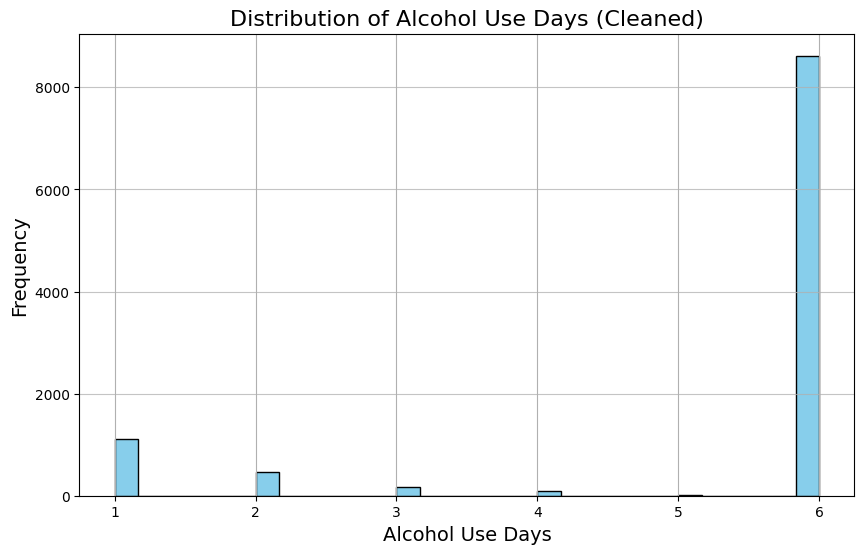

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_cleaned['ALCYDAYS'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Alcohol Use Days (Cleaned)", fontsize=16)
plt.xlabel("Alcohol Use Days", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.savefig("../results/alcohol_use_days_cleaned.png")  # Save visualization
plt.show()


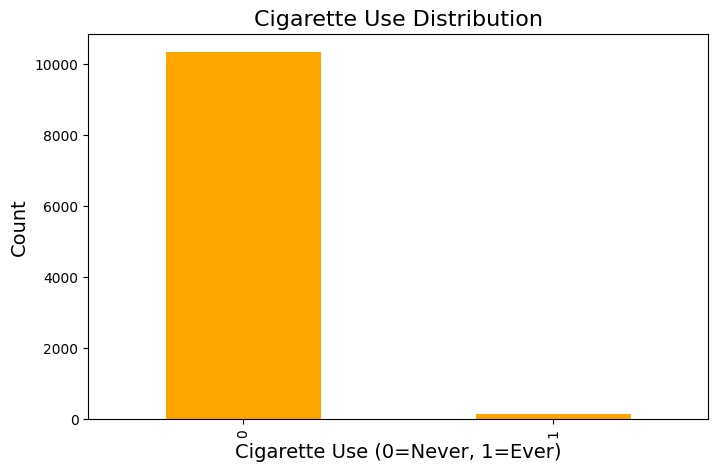

In [6]:
plt.figure(figsize=(8, 5))
df_cleaned['cigarette_use'].value_counts().plot(kind='bar', color='orange')
plt.title("Cigarette Use Distribution", fontsize=16)
plt.xlabel("Cigarette Use (0=Never, 1=Ever)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig("../results/cigarette_use_distribution.png")  # Save visualization
plt.show()


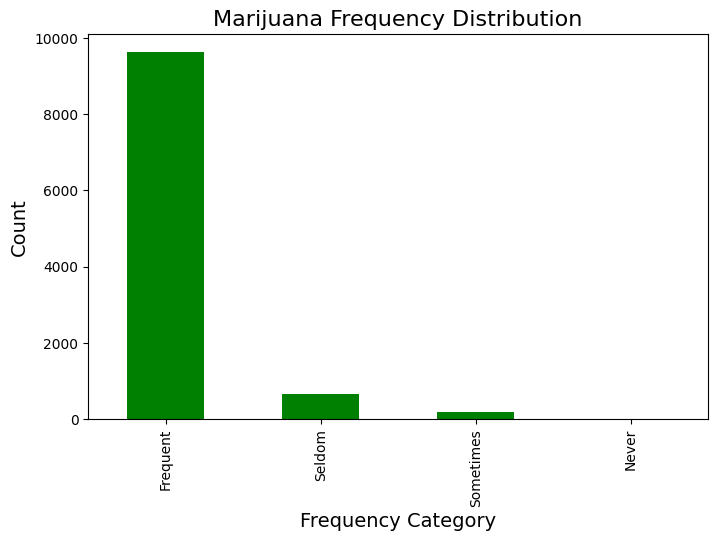

In [7]:
plt.figure(figsize=(8, 5))
df_cleaned['marijuana_freq'].value_counts().plot(kind='bar', color='green')
plt.title("Marijuana Frequency Distribution", fontsize=16)
plt.xlabel("Frequency Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig("../results/marijuana_frequency_distribution.png")  # Save visualization
plt.show()
